In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard

## Choper mon dataset
- recupérer le dataset dataset.csv

In [2]:
df = pd.read_csv('dataset.csv')
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


,x,y
count,10000.000000,10000.000000
mean,-11.680885,-2.984533
std,575.260253,345.147875
min,-999.976730,-600.786655
25%,-507.342262,-300.630452
50%,-14.942765,-4.473718
75%,480.012697,291.695880
max,999.435347,606.278862


## Diviser mon dataset

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)

## Analyser mon dataset
j'utilise la librairie pandas et seaborn pour analyser mon dataset
- pairplot me permet de voir les relations entre les différentes variables

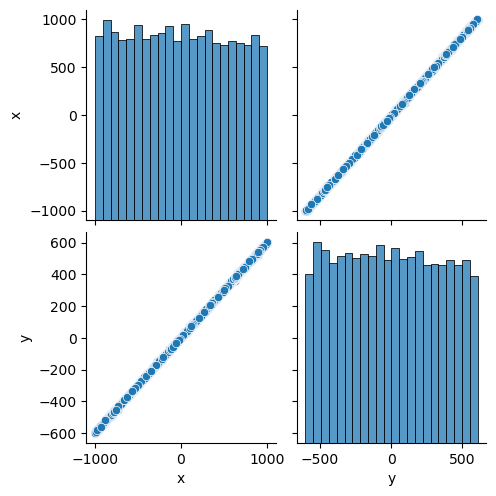

In [4]:
sns.pairplot(df)

## Créer mon modèle PMC
- j'utilise la librairie keras pour créer mon modèle
- Mon modèle est composé de plusieurs couches qui se suivent
  - il sera donc séquentiel
  - les couches sont de type Dense car elles sont toutes connectées

### Couche d'entrée
- la première couche est de type Dense
- elle a 1 seul neurone qui correspond a mon entrée x

### Couche cachée
- j'ai 2 couches cachées
- la première couche cachée a 6 neurones
- la deuxième couche cachée a 6 neurones

### Couche de sortie
- la dernière couche est de type Dense
- elle a 1 seul neurone qui correspond a ma sortie y

In [5]:
model = Sequential(
    [
		# input layer
		InputLayer(input_shape=(1,)),
		# hidden layers
		Dense(15), # couches cachées de 6 neurones
		Dense(1) # couche de sortie,
	]
)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
# Création d'un callback pour TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=5)

In [7]:
# Creation d'un callback pour enregistrer les resultats d'une prediction aléatoire
class PredictionCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs=None):
		# ecrire dans le fichier de log
		with open('logs/prediction.txt', 'a') as f:
			# choisir un échantillon aléatoire
			random_index = np.random.randint(0, x_test.shape[0])
			x_sample = x_test.iloc[random_index]
			y_sample = y_test.iloc[random_index]
			# prédire la valeur
			y_pred = self.model.predict(x_sample.values.reshape(1, -1))[0][0]
			# écrire dans le fichier de log
			f.write(f'Epoch {epoch} - Sample {random_index} - Prediction {y_pred} - True Value {y_sample}\n')


prediction_callback = PredictionCallback()


In [8]:
history = model.fit(x_train, y_train, epochs=3, callbacks=[tensorboard_callback, prediction_callback])

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step/step - loss: 57971.8281 - mae: 182.3694 
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 48351.4883 - mae: 156.1032
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step/step - loss: 19.7855 - mae: 3.954
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 19.6728 - mae: 3.9439
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step/step - loss: 16.7959 - mae: 3.611
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 16.7025 - mae: 3.5986


## Evaluer mon modèle
- j'utilise la librairie sklearn pour évaluer mon modèle
- je divise mon dataset en 2 parties : une partie pour entrainer mon modèle et une autre pour le tester
- j'utilise la méthode fit pour entrainer mon modèle
- j'utilise la méthode predict pour tester mon modèle
- j'utilise la méthode score pour évaluer mon modèle

In [9]:
y_pred = model.predict(x_test)
accuracy = model.evaluate(x_test, y_test)
accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 13.7116 - mae: 3.2346


[14.178337097167969, 3.2892274856567383]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 13.7116 - mae: 3.2346
Test Loss: [14.178337097167969, 3.2892274856567383]


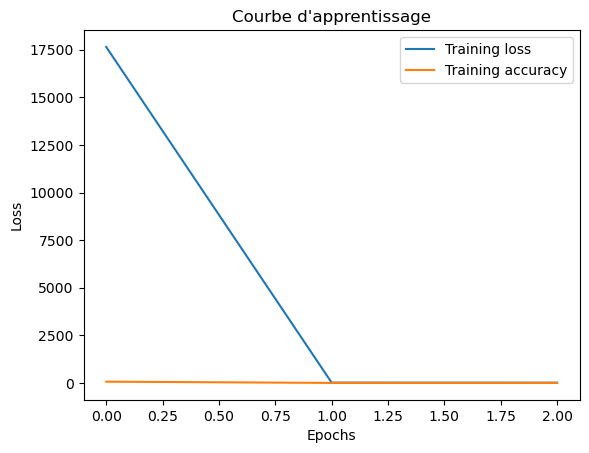

In [10]:
test_loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')

# Visualisation de la courbe d'apprentissage
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['mae'], label='Training accuracy')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
%load_ext tensorboard
%tensorboard --logdir logs
